In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os

#### Importing relevant libraries and setting up directory structure to open and export files more readily.

In [3]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP + 'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

In [4]:
genetox_df = pd.read_excel(processed_dir+'genetox_merged_110221_final.xlsx')

In [5]:
genetox_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
genetox_df.head()

,source,name,casrn,assay_category,assay_type,assay_result,species,strain,metabolic_activation,cytotoxicity,...,dose_response,panel_report,glp,guideline,dtxsid,standard_assay_type,assay_result_std,assay_outcome,aggregate_study_type,simple_aggregate
0,eChemPortal,"1,3,5-trinitro-1,3,5-triazinane",121-82-4,in vitro,fluctuation test,negative,S. typhimurium TA 98,NaN,with and without,not determined,...,NaN,NaN,no data,equivalent or similar to OECD Guideline 471 (B...,DTXSID9024142,bacterial fluctuation assay,negative,0,other,other
1,eChemPortal,"1,3,5-trinitro-1,3,5-triazinane",121-82-4,in vitro,fluctuation test,negative,S. typhimurium TA 100,NaN,with and without,not determined,...,NaN,NaN,no data,equivalent or similar to OECD Guideline 471 (B...,DTXSID9024142,bacterial fluctuation assay,negative,0,other,other
2,eChemPortal,"1,3,5-trinitro-1,3,5-triazinane",121-82-4,in vitro,fluctuation test,negative,S. typhimurium TA 98,NaN,with and without,not determined,...,NaN,NaN,no data,equivalent or similar to OECD Guideline 471 (B...,DTXSID9024142,bacterial fluctuation assay,negative,0,other,other
3,eChemPortal,nickel(2+) dichloride,7718-54-9,in vitro,bacterial fluctuation assay,negative,"other: E. coli strains WP2+, WP2-, WP6, WP67, ...",NaN,with,yes,...,NaN,NaN,no data,according to other guideline: Gatehouse 1978 (...,DTXSID7040316,bacterial fluctuation assay,negative,0,other,other
4,eChemPortal,nickel(2+) ion dichloride,7718-54-9,in vitro,bacterial fluctuation assay,negative,"other: E. coli strains WP2+, WP2-, WP6, WP67, ...",NaN,with,yes,...,NaN,NaN,no data,according to other guideline: Gatehouse 1978 (...,DTXSID7040316,bacterial fluctuation assay,negative,0,other,other


In [8]:
genetox_df.shape

(54805, 35)

In [9]:
genetox_df.dtxsid.nunique()

9299

In [10]:
genetox_df.simple_aggregate.value_counts(dropna = False, normalize = True)

Ames             0.458188
clastogen        0.262677
other            0.182958
gene_mutation    0.096177
Name: simple_aggregate, dtype: float64

In [11]:
genetox_df.simple_aggregate.value_counts(dropna = False)

Ames             25111
clastogen        14396
other            10027
gene_mutation     5271
Name: simple_aggregate, dtype: int64

In [12]:
test_for_plotting = genetox_df.groupby(['dtxsid', 'simple_aggregate']).size().reset_index()

In [13]:
test_for_plotting =test_for_plotting.iloc[:50, :]

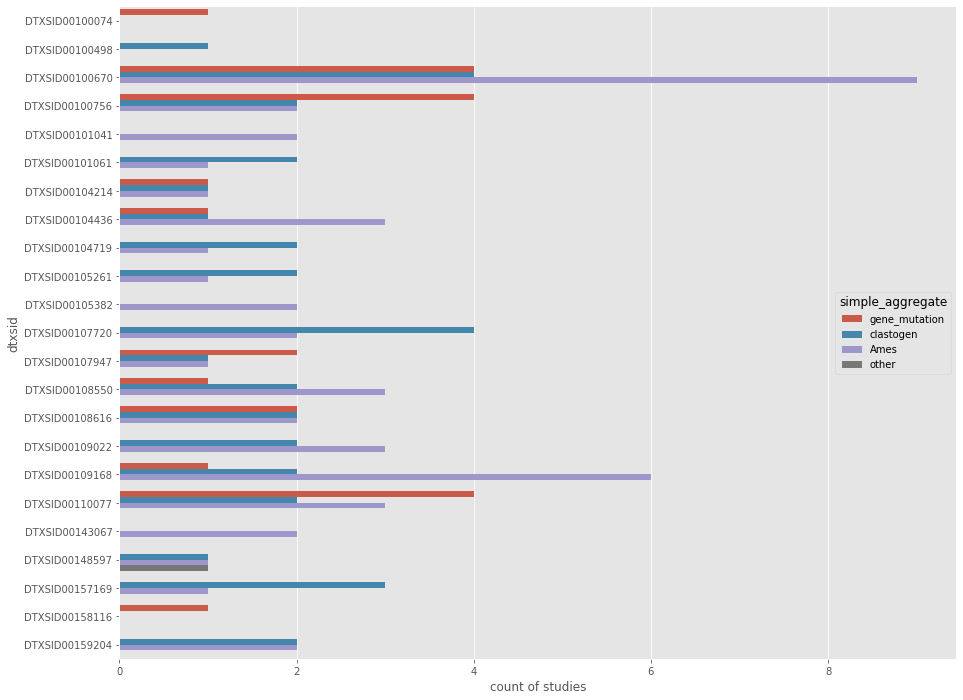

In [89]:
plt.style.use('ggplot')
plt.figure(figsize = (15,12))
sns.barplot(data = test_for_plotting, y =  'dtxsid', x = 0, hue = 'simple_aggregate')
plt.xlabel('count of studies')
plt.savefig(figures_dir+'Figure2.png', dpi = 300)

In [25]:
g = genetox_df.groupby(['dtxsid', 'simple_aggregate']).size().reset_index()

In [28]:
g.columns = ['dtxsid', 'simple_aggregate', '#studies']

#### How many chemicals tend to have 1 or more Ames studies

In [82]:
g[(g['simple_aggregate'] == 'Ames')]['#studies'].value_counts(normalize = True).head()

1    0.396873
2    0.199677
3    0.163936
4    0.071482
6    0.039092
Name: #studies, dtype: float64

In [87]:
g[(g['simple_aggregate'] == 'Ames')]['#studies'].value_counts(normalize = False).head()

1    3198
2    1609
3    1321
4     576
6     315
Name: #studies, dtype: int64

#### How many chemicals tend to have 1 or more clastogen studies

In [85]:
g[(g['simple_aggregate'] == 'clastogen')]['#studies'].value_counts(normalize = True).head()

1    0.356617
2    0.308858
4    0.096150
3    0.091732
6    0.027562
Name: #studies, dtype: float64

In [86]:
g[(g['simple_aggregate'] == 'clastogen')]['#studies'].value_counts(normalize = False).head()

1    1695
2    1468
4     457
3     436
6     131
Name: #studies, dtype: int64

#### Histograms to explore the number of studies per chemical across aggregate study types

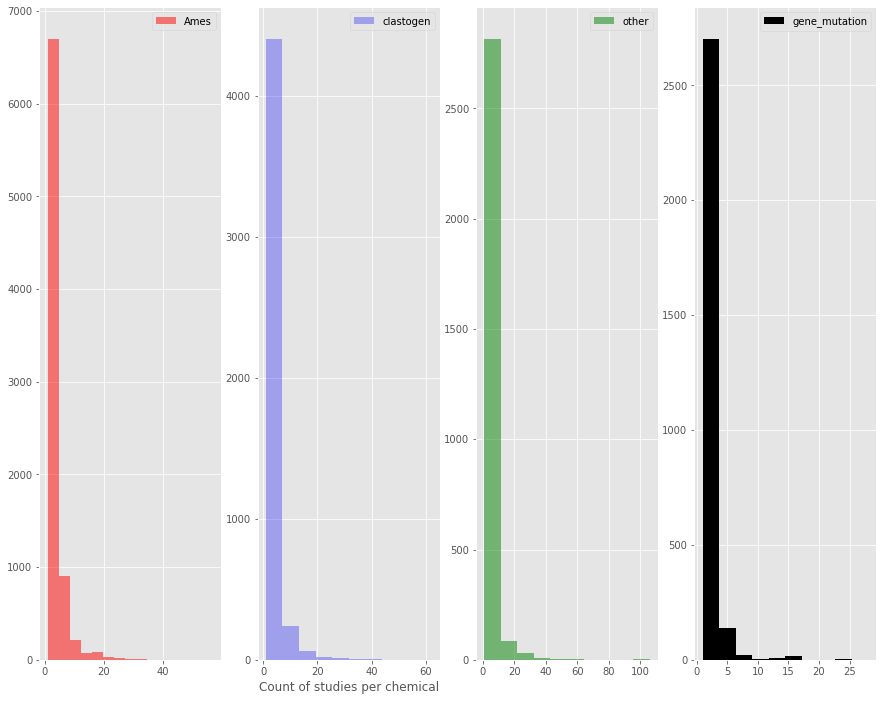

In [90]:
f, ax = plt.subplots(1,4, figsize = (15,12), sharex = False, sharey = False)
ax[0].hist(g[(g['simple_aggregate'] == 'Ames')]['#studies'], bins = 15, color = 'r', label = 'Ames', alpha = 0.5)
ax[1].hist(g[(g['simple_aggregate'] == 'clastogen')]['#studies'], color = 'b', alpha = 0.3, label = 'clastogen')
ax[2].hist(g[(g['simple_aggregate'] == 'other')]['#studies'], color = 'g', alpha = 0.5, label = 'other')
ax[3].hist(g[(g['simple_aggregate'] == 'gene_mutation')]['#studies'], color = 'black', label = 'gene_mutation')
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

ax[1].set_xlabel('Count of studies per chemical')
f.savefig(figures_dir+'Figure3.png', dpi = 300)

In [92]:
g[g['#studies'] == g['#studies'].max()]

,dtxsid,simple_aggregate,#studies
3783,DTXSID2020216,other,106


In [34]:
g[g['#studies'] == 106]

,dtxsid,simple_aggregate,#studies
3783,DTXSID2020216,other,106


In [93]:
genetox_df[genetox_df['dtxsid'] == 'DTXSID2020216']['simple_aggregate'].value_counts()

other            106
Ames              30
clastogen         19
gene_mutation      1
Name: simple_aggregate, dtype: int64

In [96]:
genetox_df[genetox_df['dtxsid'] == 'DTXSID2020216']['simple_aggregate'].count()

156

In [94]:
genetox_df[genetox_df['dtxsid'] == 'DTXSID2020216']

,source,name,casrn,assay_category,assay_type,assay_result,species,strain,metabolic_activation,cytotoxicity,...,dose_response,panel_report,glp,guideline,dtxsid,standard_assay_type,assay_result_std,assay_outcome,aggregate_study_type,simple_aggregate
612,COSMOS,BHT (INCI); BHT (Preferred Term),128-37-0,in vitro,Bacterial Mutagenesis,negative,SALMONELLA TYPHIMURIUM,TA1537,NaN,NaN,...,NaN,NaN,NaN,NaN,DTXSID2020216,bacterial reverse mutation test,negative,0,Ames,Ames
613,COSMOS,BHT (INCI); BHT (Preferred Term),128-37-0,in vitro,Bacterial Mutagenesis,negative,SALMONELLA TYPHIMURIUM,TA1535,NaN,NaN,...,NaN,NaN,NaN,NaN,DTXSID2020216,bacterial reverse mutation test,negative,0,Ames,Ames
614,COSMOS,BHT (INCI); BHT (Preferred Term),128-37-0,in vitro,Bacterial Mutagenesis,positive,SALMONELLA TYPHIMURIUM,TA1535,NaN,NaN,...,NaN,NaN,NaN,NaN,DTXSID2020216,bacterial reverse mutation test,positive,1,Ames,Ames
615,COSMOS,BHT (INCI); BHT (Preferred Term),128-37-0,in vitro,Bacterial Mutagenesis,positive,SALMONELLA TYPHIMURIUM,TA100,NaN,NaN,...,NaN,NaN,NaN,NaN,DTXSID2020216,bacterial reverse mutation test,positive,1,Ames,Ames
616,COSMOS,BHT (INCI); BHT (Preferred Term),128-37-0,in vitro,Bacterial Mutagenesis,positive,SALMONELLA TYPHIMURIUM,TA100,NaN,NaN,...,NaN,NaN,NaN,NaN,DTXSID2020216,bacterial reverse mutation test,positive,1,Ames,Ames
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53704,COSMOS,BHT (INCI); BHT (Preferred Term),128-37-0,in vitro,In Vivo Non-mammalian Mutagenesis,positive,DROSOPHILA MELANOGASTER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,DTXSID2020216,Other mutation,positive,1,other,other
53705,COSMOS,BHT (INCI); BHT (Preferred Term),128-37-0,in vitro,In Vivo Non-mammalian Mutagenesis,positive,DROSOPHILA MELANOGASTER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,DTXSID2020216,Other mutation,positive,1,other,other
53706,COSMOS,BHT (INCI); BHT (Preferred Term),128-37-0,in vitro,In Vivo Non-mammalian Mutagenesis,positive,DROSOPHILA MELANOGASTER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,DTXSID2020216,Other mutation,positive,1,other,other
53707,COSMOS,BHT (INCI); BHT (Preferred Term),128-37-0,in vitro,In Vivo Non-mammalian Mutagenesis,positive,DROSOPHILA MELANOGASTER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,DTXSID2020216,Other mutation,positive,1,other,other
